In [1]:
import sys
import os
import importlib
import random
from itertools import combinations
import glob

import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import prettypyplot as pplt

import mdtraj as md
import MDAnalysis as mda
from MDAnalysis import transformations

import ivac
import extq

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
pplt.load_cmaps()

# gating charge

In [4]:
topfile = "/project/dinner/scguo/ci-vsd/models/MD-clustering-center/civsd.psf"
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.dcd")

In [76]:
def compute_displacement_charge(u, not_ions, ions):
    Lz = u.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    # for atom in u.select_atoms("not segid ION"):
    for atom in not_ions:
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    # for atom in u.select_atoms("segid ION"):
    for atom in ions:
        z = atom.position[2]
        if z > 0:
            z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q

In [6]:
prot = u.select_atoms('protein')
print(prot.center_of_geometry())

[  0.09521525  16.87943457 -40.10689562]


In [140]:
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.8.dcd")

# wrap protein
prot = u.select_atoms("protein")
print(prot.center_of_geometry())
ions = u.select_atoms("name CLA SOD")
print(ions.positions)

trans = transformations.unwrap(prot)
# ion_unwrap = transformations.unwrap(ions)
center = transformations.center_in_box(prot, point=(0, 0, 0), wrap=False)
u.trajectory.add_transformations(trans, center)

print(prot.center_of_geometry())
ions = u.select_atoms("name CLA SOD")
print(ions.positions)

[-12.35287736   6.07900327   7.59330543]
[[ 17.485178   -30.712353   -41.04334   ]
 [  6.8070974  -11.358595    33.782207  ]
 [  5.7289453   19.875658   -23.6011    ]
 [-10.197248     8.602927    32.79372   ]
 [ 25.041985   -21.569666   -34.694126  ]
 [-16.978956     8.835208   -32.869957  ]
 [  5.034849   -11.820578   -33.675205  ]
 [-24.896708    34.319702    33.912117  ]
 [ 23.34044    -37.505722    30.935421  ]
 [  8.395207   -11.056659   -38.180878  ]
 [-34.19677     -2.257234   -32.69133   ]
 [  9.007922   -15.0761385  -16.62834   ]
 [-11.278807    27.941755   -26.375183  ]
 [ 29.345655     5.405445   -30.912933  ]
 [ -3.916707   -28.318361    37.53734   ]
 [ 23.06957     -0.54937077 -24.91356   ]
 [ 33.83349     23.472126   -18.458197  ]
 [ 31.761343    17.758553   -43.978992  ]
 [-30.822548   -30.544535    -9.337998  ]
 [  9.746582   -21.994247    -4.395435  ]
 [  8.984095   -10.378091    40.08067   ]
 [ 17.975655   -24.32601    -38.141403  ]
 [-15.9064665  -19.905596   -32.886

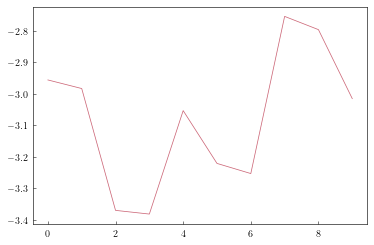

In [141]:
new_q = np.zeros(10)
not_ions = u.select_atoms("not name CLA SOD")
ions = u.select_atoms("name CLA SOD")
for i, _ in enumerate(u.trajectory[:10]):
    q = compute_displacement_charge(u, not_ions, ions)
    new_q[i] = q

plt.plot(new_q)

In [33]:
len(u.trajectory)

10000

(-5.0, -2.5)

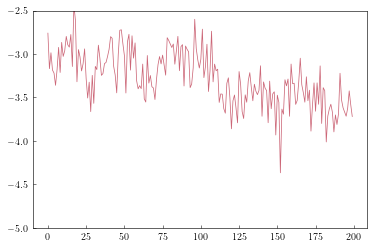

In [46]:
plt.plot(new_q[2800:3000])
plt.ylim([-5, -2.5])

In [25]:
for i in u.trajectory[2300:2400]:
    print(i.frame, u.select_atoms("name CLA SOD").positions[:, 2])

2300 [-43.47067  -52.526028 -67.79434  -42.781013 -24.197973 -53.191036
 -27.117989 -67.146454 -36.93564  -42.281494 -58.85095  -69.50614
 -68.11855  -45.611366 -39.302933 -47.87273  -30.520018 -37.166016
 -17.721615 -49.81451  -36.531395 -50.971756 -59.795242 -29.572206
 -40.082897 -30.447456 -27.49662  -44.354    -26.098866 -40.03946
 -37.621025 -60.05675  -44.571785 -58.29046  -26.449215 -27.44431
 -42.80782  -33.84791  -32.535275]
2301 [-33.529594 -48.76929  -68.749695 -47.494865 -34.087376 -52.409492
 -30.233742 -71.172134 -34.675777 -48.12261  -51.242184 -67.69824
 -71.044685 -56.854424 -38.043858 -52.091442 -25.185816 -36.114048
 -19.168333 -50.851288 -38.25863  -53.19473  -61.890236 -44.043877
 -32.597176 -27.325901 -28.342354 -66.24352  -29.61452  -27.74722
 -49.817284 -59.081993 -29.684536 -48.543858 -33.136547 -28.90337
 -36.093983 -34.237743 -49.254448]
2302 [-25.377533 -51.7962   -69.54515  -42.769863 -32.10053  -55.893444
 -25.423552 -71.23693  -34.388268 -48.38802  -42.3

In [26]:
displacement_2 = np.load("../../data/raw_feat/displacement_q_0-178.npy")

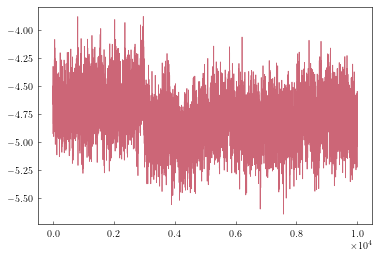

In [39]:
plt.plot(displacement_2[5])

In [127]:
# u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.dcd")
u = mda.Universe(topfile, ["/beagle3/dinner/scguo/anton2-backup/workdir.65/run41_257.final.dms", "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.dcd"])
prot = u.select_atoms("protein")
print(prot.center_of_geometry())
ions = u.select_atoms("name CLA SOD")
print(u.trajectory[1].positions[ions.indices])


trans = transformations.unwrap(prot)
# ion_unwrap = transformations.unwrap(ions)
center = transformations.center_in_box(u.select_atoms("protein"), point=(0, 0, 0), wrap=False)
u.trajectory.add_transformations(trans, center)

print(prot.center_of_geometry())
ions = u.select_atoms("name CLA SOD")
print(u.trajectory[1].positions[ions.indices])

[ 0.24868119 17.95244877 48.5442099 ]
[[ -8.615885   -28.0681      14.290884  ]
 [-36.44273     12.27577    -21.499979  ]
 [ -4.2576942   28.683691   -24.265177  ]
 [ 35.398117    10.1889515    1.7307932 ]
 [ 36.064514   -14.406881    20.439386  ]
 [ -8.911269    38.52458     -5.5900154 ]
 [-11.4102545    9.815125   -19.868574  ]
 [-14.879112   -31.579536    28.86974   ]
 [ 34.544003   -31.548418    12.127426  ]
 [ -0.6015171  -34.018703   -24.022392  ]
 [-33.252186    -7.6476235  -23.726076  ]
 [ -3.6708906  -32.408108   -14.4600725 ]
 [ 26.633955   -13.822127    29.941832  ]
 [-10.164293   -20.639025    -8.448333  ]
 [ 24.972534    -5.839796   -27.67086   ]
 [-12.102761   -35.12592    -23.337788  ]
 [-12.733411     2.3813293   20.112473  ]
 [ 11.873061    -0.41219115  19.326717  ]
 [  3.3514917   -6.1322565   17.016682  ]
 [-23.254559    29.567007    25.143856  ]
 [ 17.873787    -9.641402    -8.428328  ]
 [ 36.936714     7.2476296   -7.5184426 ]
 [  2.2283645  -17.772978   -13.315244

In [75]:
print(len(u.trajectory))
for _ in u.trajectory[:10]:
    print(u.dimensions)

10001
[77.96524 77.96524 89.5072  90.      90.      90.     ]
[77.968605 77.968605 88.81582  90.       90.       90.      ]
[78.14098 78.14098 88.23754 90.      90.      90.     ]
[78.12425 78.12425 88.34424 90.      90.      90.     ]
[78.141846 78.141846 87.94327  90.       90.       90.      ]
[78.26712 78.26712 87.56224 90.      90.      90.     ]
[78.27346 78.27346 87.98977 90.      90.      90.     ]
[78.255745 78.255745 87.97105  90.       90.       90.      ]
[78.31607 78.31607 87.71514 90.      90.      90.     ]
[77.89792  77.89792  88.452835 90.       90.       90.      ]


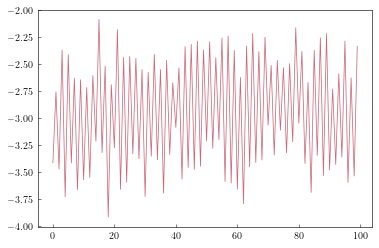

In [128]:
new_q = np.zeros(100)
not_ions = u.select_atoms("not name CLA SOD")
ions = u.select_atoms("name CLA SOD")
for i, _ in enumerate(u.trajectory[:100]):
    q = compute_displacement_charge(u, not_ions, ions)
    new_q[i] = q

plt.plot(new_q)

In [118]:
displacement_old = np.load("../../data/raw_feat/displacement_q_anton2.npy")

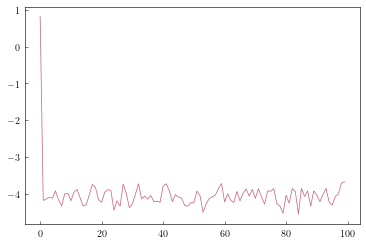

In [139]:
plt.plot(displacement_old[6][:100])

In [143]:
def compute_displacement_charge_single(dmsfile, not_ions, ions):
    u = mda.Universe(topfile, dmsfile)
    prot = u.select_atoms("protein")
    trans = transformations.unwrap(prot)
    center = transformations.center_in_box(prot, point=(0, 0, 0), wrap=False)
    u.trajectory.add_transformations(trans, center)
    
    not_ions = u.select_atoms("not name CLA SOD")
    ions = u.select_atoms("name CLA SOD")
    Lz = u.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    # for atom in u.select_atoms("not segid ION"):
    for atom in not_ions:
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    # for atom in u.select_atoms("segid ION"):
    for atom in ions:
        z = atom.position[2]
        if z > 0:
            z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q

In [144]:
results_all = np.zeros((115))
ix = 0
for i in range(3, 119):
    print(ix)
    if i == 82:
        continue
    files = glob.glob(f"/beagle3/dinner/scguo/anton2-backup/workdir.{i}/*.dms")
    k = ""
    for f in files:
        if not "group" in f: # exclude groups.dms file
            k = f
    results_all[ix] = compute_displacement_charge_single(k, not_ions, ions)
    ix += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


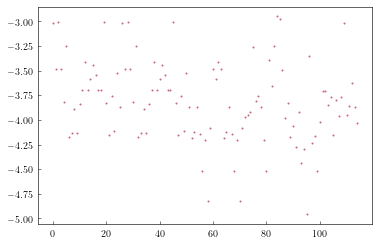

In [145]:
plt.plot(results_all, '.')

In [146]:
np.save("../../data/raw_feat/displacement_q_anton2_start.npy", results_all)

In [147]:
dq_anton2 = np.load("../../data/raw_feat/displacement_q_anton2.npy")

(array([2.40000e+01, 4.13000e+02, 3.14100e+03, 1.03970e+04, 1.74720e+04,
        2.55100e+04, 6.67460e+04, 1.62620e+05, 2.62118e+05, 2.64401e+05,
        1.61952e+05, 7.72560e+04, 4.95140e+04, 2.98620e+04, 1.10040e+04,
        4.56000e+03, 2.34600e+03, 6.93000e+02, 8.10000e+01, 5.00000e+00]),
 array([-5.56676672, -5.37544838, -5.18413004, -4.9928117 , -4.80149336,
        -4.61017502, -4.41885668, -4.22753834, -4.03622   , -3.84490166,
        -3.65358332, -3.46226498, -3.27094665, -3.07962831, -2.88830997,
        -2.69699163, -2.50567329, -2.31435495, -2.12303661, -1.93171827,
        -1.74039993]),
 <BarContainer object of 20 artists>)

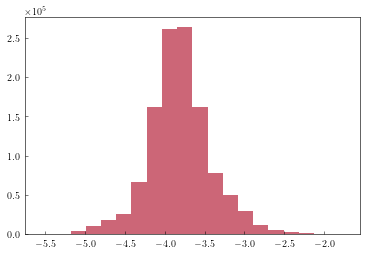

In [148]:
plt.hist(np.concatenate(dq_anton2), bins=20)

In [150]:
displacement_2.shape

(179, 10000)